In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [294]:
df_2048 = pd.read_csv('efs-scalability-2048.csv')
df_2048_2 = pd.read_csv('efs-scalability-2048-2.csv')
df_512 = pd.read_csv('efs-scalability-512.csv')
df_512_2 = pd.read_csv('efs-scalability-512-2.csv')

In [295]:
df

,second_type/S,disk_read_bandwidth/N,disk_read_latency/N,third_type/S,fs/S,bs/S,test/S,type/S,id/N,count/S,latency/N,result/S
0,sequence,1.018620,196.344131,read,200MB,1024KB,efs_strong100,efs,1.596427e+09,NaN,NaN,NaN
1,dd,NaN,NaN,NaN,NaN,1024KB,efs_strong200,efs,1.596429e+09,200.0,405.402032,"209715200 bytes (210 MB) copied, 405.34 s, 517..."
2,random,0.502864,397.721871,read,200MB,1024KB,efs_strong200,efs,1.596426e+09,NaN,NaN,NaN
3,random,0.505213,395.872552,read,200MB,1024KB,efs_strong200,efs,1.596426e+09,NaN,NaN,NaN
4,sequence,0.488547,409.377037,read,200MB,1024KB,efs_strong200,efs,1.596428e+09,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,sequence,2.473497,80.857169,read,200MB,1024KB,efs_strong50,efs,1.596427e+09,NaN,NaN,NaN
1139,random,0.504747,396.238407,read,200MB,1024KB,efs_strong200,efs,1.596426e+09,NaN,NaN,NaN
1140,sequence,0.502665,397.879012,read,200MB,1024KB,efs_strong200,efs,1.596428e+09,NaN,NaN,NaN
1141,random,0.512190,390.480364,read,200MB,1024KB,efs_strong200,efs,1.596426e+09,NaN,NaN,NaN


In [307]:
df_ran = df.copy()
df_seq = df.copy()
df_dd = df.copy()

df_ran = df_ran[df_ran['second_type/S'].isin(['random'])]
df_seq = df_seq[df_seq['second_type/S'].isin(['sequence'])]
df_dd = df_dd[df_dd['second_type/S'].isin(['dd'])]

concurrency = ['efs_strong1',
             'efs_strong10',
             'efs_strong20',
             'efs_strong50',
             'efs_strong100',
             'efs_strong200']

In [325]:
df_ran = df_512_2.copy()
df_seq = df_512_2.copy()
df_dd = df_512_2.copy()
# make graph
file_size = 200
df_ran = df_ran[df_ran['second_type/S'].isin(['random'])]
df_seq = df_seq[df_seq['second_type/S'].isin(['sequence'])]
df_dd = df_dd[df_dd['second_type/S'].isin(['dd'])]

concurrency = ['efs_strong1',
             'efs_strong10',
             'efs_strong20',
             'efs_strong50',
             'efs_strong100',
             'efs_strong200']
concurrency_num = ['1','10','20','50','100','200']
ran_latency = []
ran_bw = []
ran_lat_err = []
ran_bw_err = []
for ran in concurrency:
    df_col = df_ran[df_ran['test/S'].isin([ran])]
    avg_latency = df_col['disk_read_latency/N'].median()
    avg_bandwidth = df_col['disk_read_bandwidth/N'].median()
    ran_latency.append(avg_latency)
    ran_bw.append(avg_bandwidth)
    ran_lat_err.append((avg_latency - df_col['disk_read_latency/N'].min(),df_col['disk_read_latency/N'].max() - avg_latency)) 
    ran_bw_err.append((avg_bandwidth - df_col['disk_read_bandwidth/N'].min(),df_col['disk_read_bandwidth/N'].max() - avg_bandwidth)) 
error_lat_ran = np.array(ran_lat_err)
error_bw_ran = np.array(ran_bw_err)

seq_latency = []
seq_bw = []
seq_lat_err = []
seq_bw_err = []
for seq in concurrency:
    df_col = df_seq[df_seq['test/S'].isin([seq])]
    avg_latency = df_col['disk_read_latency/N'].median()
    avg_bandwidth = df_col['disk_read_bandwidth/N'].median()
    seq_latency.append(avg_latency)
    seq_bw.append(avg_bandwidth)
    seq_lat_err.append((avg_latency - df_col['disk_read_latency/N'].min(),df_col['disk_read_latency/N'].max() - avg_latency)) 
    seq_bw_err.append((avg_bandwidth - df_col['disk_read_bandwidth/N'].min(),df_col['disk_read_bandwidth/N'].max() - avg_bandwidth)) 
error_lat_seq = np.array(seq_lat_err)
error_bw_seq = np.array(seq_bw_err)

dd_latency = []
dd_bw = []
dd_lat_err = []
dd_bw_err = []
for d in concurrency:
    df_col = df_dd[df_dd['test/S'].isin([d])]
    avg_latency = df_col['latency/N'].median()
    avg_bandwidth = file_size / avg_latency
    dd_latency.append(avg_latency)
    dd_bw.append(avg_bandwidth)
    dd_lat_err.append((avg_latency - df_col['latency/N'].min(),df_col['latency/N'].max() - avg_latency)) 
    dd_bw_err.append((avg_bandwidth - (file_size / df_col['latency/N'].max()),(file_size / df_col['latency/N'].min()) - avg_bandwidth)) 
error_lat_dd = np.array(dd_lat_err)
error_bw_dd = np.array(dd_bw_err)

print(error_bw_dd)

[[0.         0.        ]
 [1.32700891 0.62760958]
 [0.08974374 0.38447258]
 [0.02459715 0.14233239]
 [0.1401516  0.16014894]
 [0.00609201 0.04229446]]


Text(0.5, 0.98, 'Lambda:512MB')

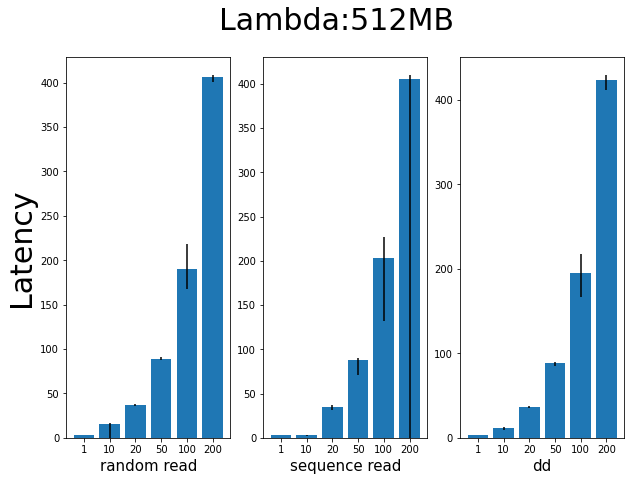

In [317]:
fig, axes = plt.subplots(1,3,figsize=(10,7))

axes[0] = plt.subplot(1,3,1)
axes[1] = plt.subplot(1,3,2)
axes[2] = plt.subplot(1,3,3)
axes[0].bar(concurrency_num,ran_latency,yerr=error_lat_ran.T)
axes[0].set_xlabel('random read',fontsize=15)
axes[1].bar(concurrency_num,seq_latency,yerr=error_lat_seq.T)
axes[1].set_xlabel('sequence read',fontsize=15)
axes[2].bar(concurrency_num,dd_latency,yerr=error_lat_dd.T)
axes[2].set_xlabel('dd',fontsize=15)
axes[0].set_ylabel('Latency',fontsize=30)
fig.suptitle('Lambda:512MB',fontsize=30)

[[ 0.          0.        ]
 [ 2.54811454  2.14054179]
 [ 3.89653158  1.36481619]
 [15.25089574  2.03656745]
 [53.06795883 24.03522944]
 [11.57278252  3.81186748]]


Text(0.5, 0.98, 'Lambda:512MB')

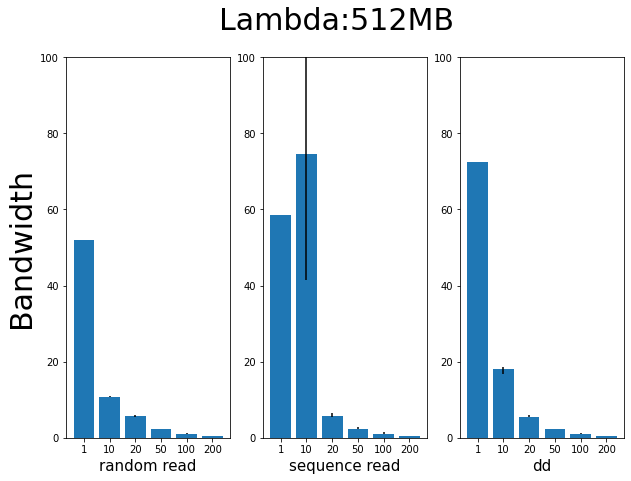

In [341]:
fig, axes = plt.subplots(1,3,figsize=(10,7))
axes[0] = plt.subplot(1,3,1)
plt.ylim((0,100))
axes[1] = plt.subplot(1,3,2)
plt.ylim((0,100))
axes[2] = plt.subplot(1,3,3)
plt.ylim((0,100))
axes[0].bar(concurrency_num,ran_bw,yerr=error_bw_ran.T)
axes[0].set_xlabel('random read',fontsize=15)
axes[1].bar(concurrency_num,seq_bw,yerr=error_bw_seq.T)
axes[1].set_xlabel('sequence read',fontsize=15)
print(error_seq)

axes[2].bar(concurrency_num,dd_bw,yerr=error_bw_dd.T)
axes[2].set_xlabel('dd',fontsize=15)
axes[0].set_ylabel('Bandwidth',fontsize=30)
fig.suptitle('Lambda:512MB',fontsize=30)


In [323]:
df_ran = df_2048_2.copy()
df_seq = df_2048_2.copy()
df_dd = df_2048_2.copy()
# make graph
file_size = 200
df_ran = df_ran[df_ran['second_type/S'].isin(['random'])]
df_seq = df_seq[df_seq['second_type/S'].isin(['sequence'])]
df_dd = df_dd[df_dd['second_type/S'].isin(['dd'])]

concurrency = ['efs_strong1',
             'efs_strong10',
             'efs_strong20',
             'efs_strong50',
             'efs_strong100',
             'efs_strong200']
concurrency_num = ['1','10','20','50','100','200']
ran_latency = []
ran_bw = []
ran_lat_err = []
ran_bw_err = []
for ran in concurrency:
    df_col = df_ran[df_ran['test/S'].isin([ran])]
    avg_latency = df_col['disk_read_latency/N'].median()
    avg_bandwidth = df_col['disk_read_bandwidth/N'].median()
    ran_latency.append(avg_latency)
    ran_bw.append(avg_bandwidth)
    ran_lat_err.append((avg_latency - df_col['disk_read_latency/N'].min(),df_col['disk_read_latency/N'].max() - avg_latency)) 
    ran_bw_err.append((avg_bandwidth - df_col['disk_read_bandwidth/N'].min(),df_col['disk_read_bandwidth/N'].max() - avg_bandwidth)) 
error_lat_ran = np.array(ran_lat_err)
error_bw_ran = np.array(ran_bw_err)

seq_latency = []
seq_bw = []
seq_lat_err = []
seq_bw_err = []
for seq in concurrency:
    df_col = df_seq[df_seq['test/S'].isin([seq])]
    avg_latency = df_col['disk_read_latency/N'].median()
    avg_bandwidth = df_col['disk_read_bandwidth/N'].median()
    seq_latency.append(avg_latency)
    seq_bw.append(avg_bandwidth)
    seq_lat_err.append((avg_latency - df_col['disk_read_latency/N'].min(),df_col['disk_read_latency/N'].max() - avg_latency)) 
    seq_bw_err.append((avg_bandwidth - df_col['disk_read_bandwidth/N'].min(),df_col['disk_read_bandwidth/N'].max() - avg_bandwidth)) 
error_lat_seq = np.array(seq_lat_err)
error_bw_seq = np.array(seq_bw_err)

dd_latency = []
dd_bw = []
dd_lat_err = []
dd_bw_err = []
for d in concurrency:
    df_col = df_dd[df_dd['test/S'].isin([d])]
    avg_latency = df_col['latency/N'].median()
    avg_bandwidth = file_size / avg_latency
    dd_latency.append(avg_latency)
    dd_bw.append(avg_bandwidth)
    dd_lat_err.append((avg_latency - df_col['latency/N'].min(),df_col['latency/N'].max() - avg_latency)) 
    dd_bw_err.append((avg_bandwidth - (file_size / df_col['latency/N'].max()),(file_size / df_col['latency/N'].min()) - avg_bandwidth)) 
error_lat_dd = np.array(dd_lat_err)
error_bw_dd = np.array(dd_bw_err)

print(error_bw_dd)

[[0.         0.        ]
 [0.59662988 4.72092439]
 [0.16325894 0.21414418]
 [0.03517171 0.09474928]
 [0.10986493 0.16832281]
 [0.00588535 0.01393229]]


[[ 0.          0.        ]
 [ 2.54811454  2.14054179]
 [ 3.89653158  1.36481619]
 [15.25089574  2.03656745]
 [53.06795883 24.03522944]
 [11.57278252  3.81186748]]


Text(0.5, 0.98, 'Lambda:2048MB')

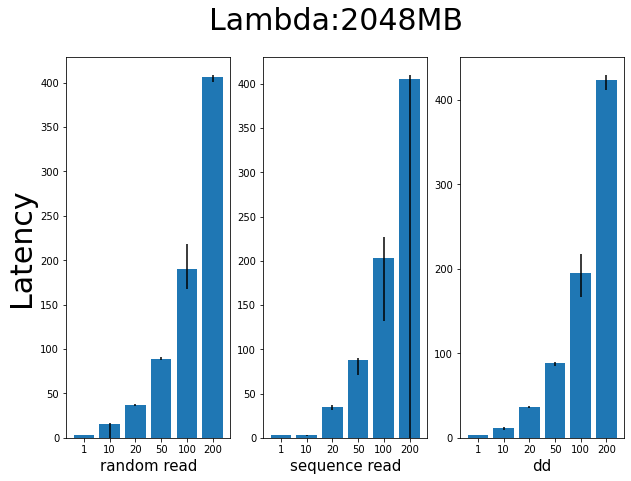

In [316]:
fig, axes = plt.subplots(1,3,figsize=(10,7))

axes[0] = plt.subplot(1,3,1)
axes[1] = plt.subplot(1,3,2)
axes[2] = plt.subplot(1,3,3)
axes[0].bar(concurrency_num,ran_latency,yerr=error_lat_ran.T)
axes[0].set_xlabel('random read',fontsize=15)
axes[1].bar(concurrency_num,seq_latency,yerr=error_lat_seq.T)
axes[1].set_xlabel('sequence read',fontsize=15)
print(error_seq)
axes[2].bar(concurrency_num,dd_latency,yerr=error_lat_dd.T)
axes[2].set_xlabel('dd',fontsize=15)
axes[0].set_ylabel('Latency',fontsize=30)
fig.suptitle('Lambda:2048MB',fontsize=30)

[[ 0.          0.        ]
 [ 2.54811454  2.14054179]
 [ 3.89653158  1.36481619]
 [15.25089574  2.03656745]
 [53.06795883 24.03522944]
 [11.57278252  3.81186748]]


(0.0, 70.0)

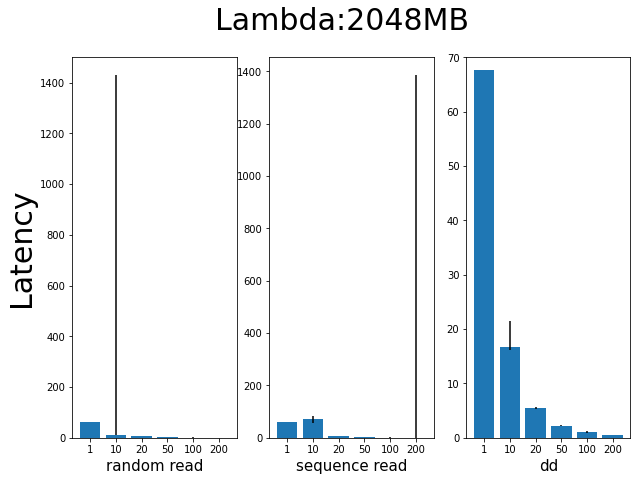

In [324]:
fig, axes = plt.subplots(1,3,figsize=(10,7))
axes[0] = plt.subplot(1,3,1)
plt.ylim((0,100))
axes[1] = plt.subplot(1,3,2)
plt.ylim((0,100))
axes[2] = plt.subplot(1,3,3)
plt.ylim((0,100))
axes[0].bar(concurrency_num,ran_bw,yerr=error_bw_ran.T)
axes[0].set_xlabel('random read',fontsize=15)
axes[1].bar(concurrency_num,seq_bw,yerr=error_bw_seq.T)
axes[1].set_xlabel('sequence read',fontsize=15)

axes[2].bar(concurrency_num,dd_bw,yerr=error_bw_dd.T)
axes[2].set_xlabel('dd',fontsize=15)
axes[0].set_ylabel('Bandwidth',fontsize=30)
fig.suptitle('Lambda:512MB',fontsize=30)


[[ 0.          2.64354002  1.35263503  3.56932425 27.39347529 12.15142822]
 [ 0.          0.44451272  1.1038605   1.40243053 23.29964328  5.35133171]]


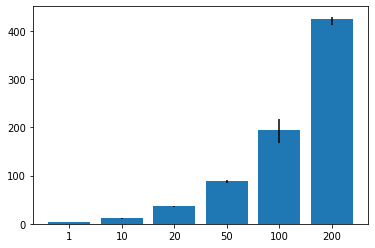

In [301]:
plt.bar(['1','10','20','50','100','200'],
       dd_latency
        ,yerr=error_dd.T)
print(error_dd.T)